In [1]:
import numpy as np
import matplotlib.pyplot as plt
import swiftest

In [2]:
swiftersim = swiftest.Simulation(param_file="param.swifter.in", codename="Swifter")
swiftersim.bin2xr()

Reading Swifter file param.swifter.in
Reading in time 1.000e+00
Creating Dataset
Successfully converted 1462 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
swiftestsim = swiftest.Simulation(param_file="param.swiftest.in")
swiftestsim.bin2xr()

Reading Swiftest file param.swiftest.in
Reading in time 1.001e+00
Creating Dataset
Successfully converted 1463 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestsim.ds - swiftersim.ds

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (y)'})

In [6]:
swiftdiff['dr'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['dv'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

In [7]:
pldiff = swiftdiff.where(np.invert(np.isnan(swiftdiff['Mass'])), drop=True)
tpdiff = swiftdiff.where(np.isnan(swiftdiff['Mass']), drop=True)

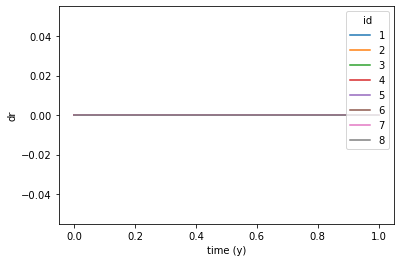

In [8]:
pldiff['dr'].plot.line(x="time (y)")
print()

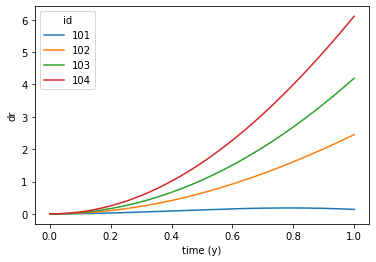

In [9]:
tpdiff['dr'].plot.line(x="time (y)")
print()

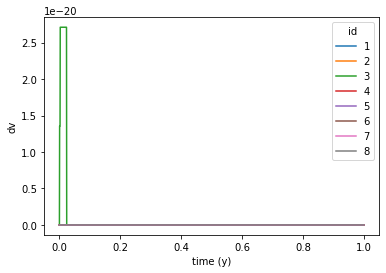

In [10]:
pldiff['dv'].plot.line(x="time (y)")
print()

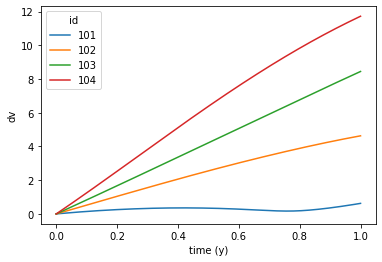

In [11]:
tpdiff['dv'].plot.line(x="time (y)")
print()

In [12]:
tpdiff

<xarray.Dataset>
Dimensions:   (id: 4, time (y): 1462)
Coordinates:
  * id        (id) int64 101 102 103 104
  * time (y)  (time (y)) float64 0.0 0.0006845 0.001369 ... 0.9986 0.9993 1.0
Data variables:
    Mass      (time (y), id) float64 nan nan nan nan nan ... nan nan nan nan nan
    Radius    (time (y), id) float64 nan nan nan nan nan ... nan nan nan nan nan
    px        (time (y), id) float64 0.0 0.0 0.0 0.0 ... 1.001 -0.6538 -2.995
    py        (time (y), id) float64 0.0 0.0 0.0 0.0 ... -2.233 -4.116 -5.31
    pz        (time (y), id) float64 0.0 0.0 0.0 0.0 ... -0.08684 0.4693 0.3703
    vx        (time (y), id) float64 0.0 0.0 0.0 0.0 ... 2.549 0.02329 -3.212
    vy        (time (y), id) float64 0.0 0.0 0.0 0.0 ... -3.791 -8.402 -11.27
    vz        (time (y), id) float64 0.0 0.0 0.0 0.0 ... -0.768 0.8964 0.4534
    dr        (time (y), id) float64 0.0 0.0 0.0 0.0 ... 2.448 4.194 6.107
    dv        (time (y), id) float64 0.0 0.0 0.0 0.0 ... 4.632 8.449 11.73